In [ ]:
import torch
import fastai

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Train Bus Helicopter  Boat Airplane Car Motorcycle Bicycle Truck  --type_csv train --limit 250


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Train.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 42526 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

path = Path('train')

In [ ]:
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [ ]:
dls = transports.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 77.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.066027,0.842199,0.742222,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.936482,0.750246,0.771111,00:29
1,0.713849,0.787630,0.771111,00:29
2,0.515842,0.773719,0.784444,00:31
3,0.365672,0.791683,0.771111,00:31


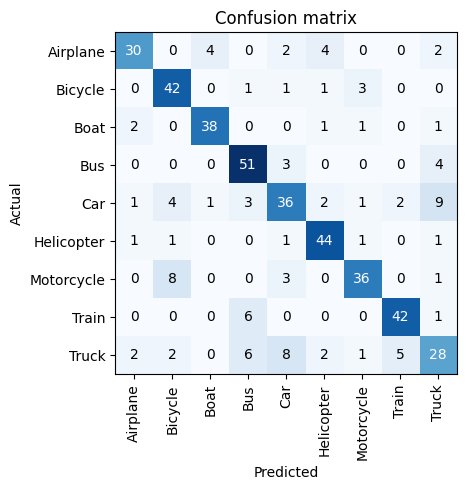

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

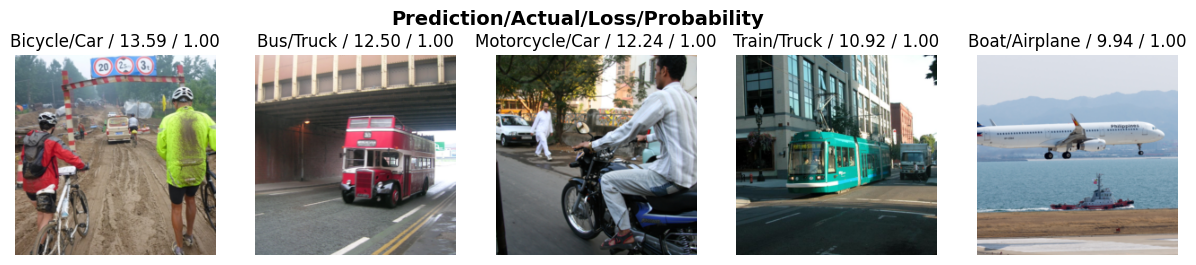

In [ ]:
interp.plot_top_losses(5, nrows= 1)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Airplane
Accuracy: 99.55%


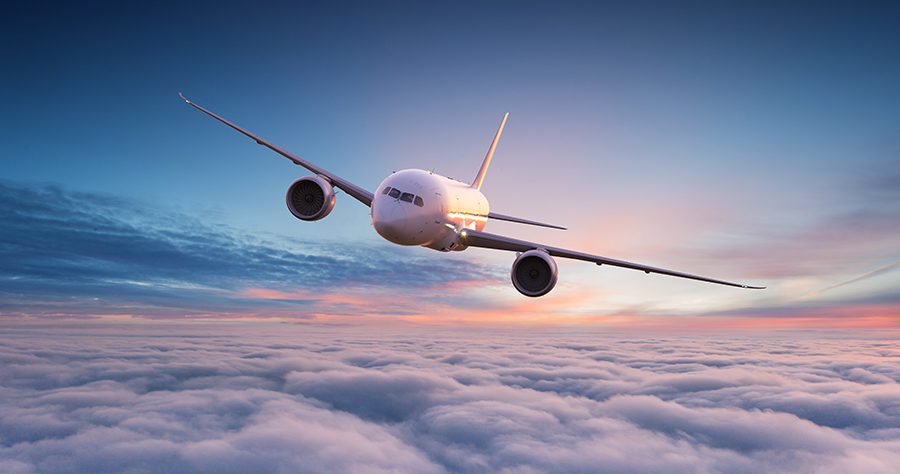

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Prediction: {pred}")
print(f"Accuracy: {probs[pred_id]*100:.2f}%")
img

In [ ]:
learn.export('final_model.pkl')

In [ ]:
# motorcycle
# truck
# bicycle